In [26]:
import sys

In [27]:
sys.dont_write_bytecode = True

In [28]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_olivetti_faces

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline

from GaussianMixtureModel import GaussianMixtureModel

In [29]:
np.random.seed(0)

In [30]:
olivetti_faces = fetch_olivetti_faces()

X = olivetti_faces.data

Y = olivetti_faces.target

In [31]:
IMAGE = olivetti_faces.images

In [32]:
PERSON = np.unique(Y)

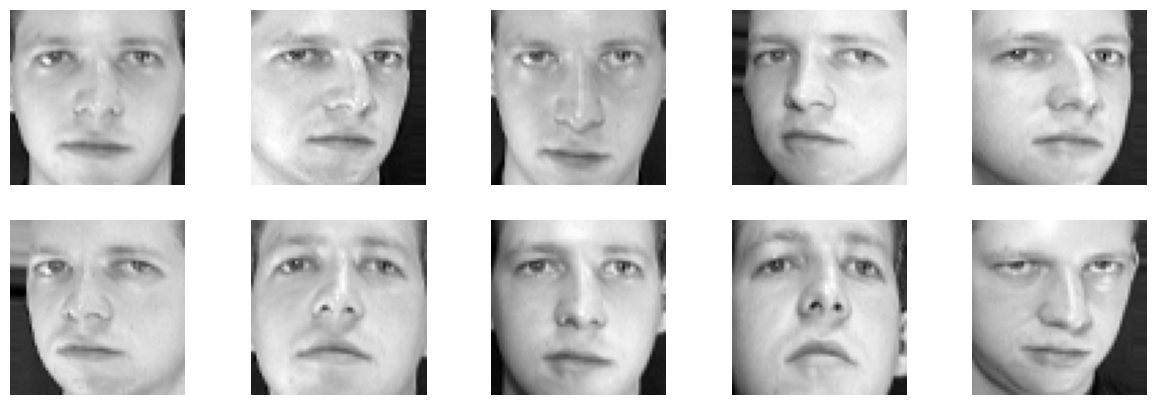

In [33]:
fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (15, 5))

axes = axes.ravel()

IMAGE_PERSON = IMAGE[Y == np.random.choice(PERSON)]

N_PERSON = len(IMAGE_PERSON)

for i in range(N_PERSON):

    axes[i].imshow(IMAGE_PERSON[i], cmap = 'gray')

    axes[i].axis('off')

plt.show()

In [34]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(

    X, Y, 
    
    test_size = 0.2,

    stratify = Y

)

In [35]:
N_TRAIN = len(Y_TRAIN)

N_TEST = len(Y_TEST)

In [36]:
PRE_PROCESSING = Pipeline(

    steps = [

        ('StandardScaler', StandardScaler()), 
        
        ('PCA', PCA(n_components = 0.85))

    ]

)

PRE_PROCESSING.fit(X_TRAIN);

In [37]:
X_TRAIN_PCA = PRE_PROCESSING.transform(X_TRAIN)

X_TEST_PCA = PRE_PROCESSING.transform(X_TEST)

X_TRAIN_PCA_INV = PRE_PROCESSING.inverse_transform(X_TRAIN_PCA)

IMAGE_TRAIN_PCA_INV = X_TRAIN_PCA_INV.reshape(N_TRAIN, 64, 64)

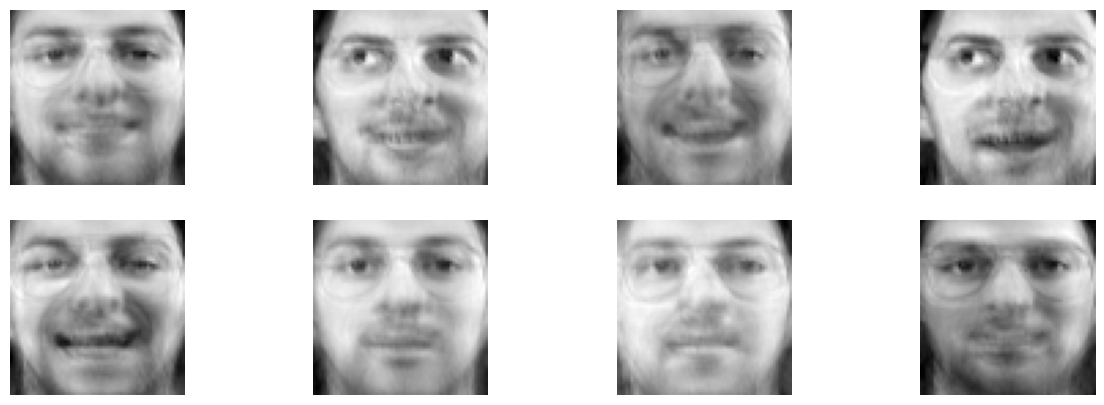

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 5))

axes = axes.ravel()

IMAGE_TRAIN_PCA_INV_PERSON = IMAGE_TRAIN_PCA_INV[Y_TRAIN == np.random.choice(PERSON)]

N_PERSON = len(IMAGE_TRAIN_PCA_INV_PERSON)

for i in range(N_PERSON):

    axes[i].imshow(IMAGE_TRAIN_PCA_INV_PERSON[i], cmap = 'gray')

    axes[i].axis('off')

plt.show()

In [39]:
GMM = {}

for FACE in PERSON:

    GMM[f'{FACE}'] = GaussianMixtureModel(

        X = X_TRAIN_PCA[Y_TRAIN == FACE],

        M = 4

    )

    GMM[f'{FACE}'].update_model()

In [40]:
RANDOM_PERSON = np.random.choice(PERSON)

IMAGE_PERSON = IMAGE[Y == RANDOM_PERSON]

RANDOM_IMAGE =  np.random.randint(low = 0, high = len(IMAGE_PERSON))

GMM_PERSON = GMM[f'{RANDOM_PERSON}']

MU_INV = PRE_PROCESSING.inverse_transform(GMM[f'{RANDOM_PERSON}'].mu)

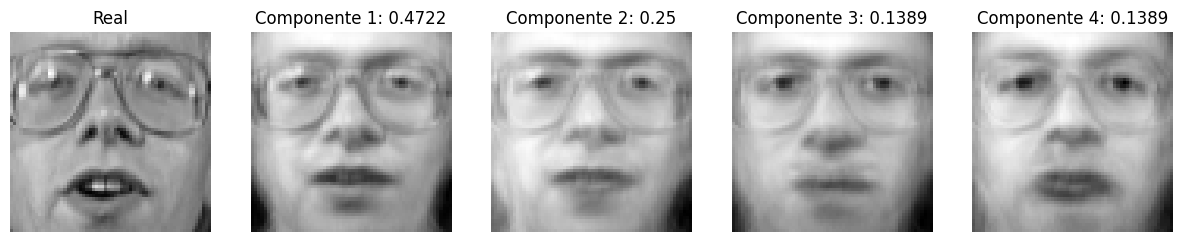

In [41]:
fig, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (15, 5))

axes = axes.ravel()

M_MIXTURE = len(MU_INV)

axes[0].imshow(IMAGE_PERSON[RANDOM_IMAGE], cmap = 'gray')

axes[0].axis('off')

axes[0].set_title('Real')

for i in range(M_MIXTURE):

    axes[i + 1].imshow(MU_INV[i].reshape(64, 64), cmap = 'gray')

    axes[i + 1].axis('off')

    PI_MIXTURE = GMM[f'{RANDOM_PERSON}'].pi[i]

    axes[i + 1].set_title(f'Componente {i + 1}: {np.round(PI_MIXTURE, 4)}')

plt.show()

In [46]:
P = []

for FACE in PERSON:

    P.append(GMM[f'{FACE}'].predictive_distribution(X_TEST_PCA))

P = np.array(P)

Y_PRED = np.argmax(P, axis = 0)

print(np.sum(Y_PRED == Y_TEST)/N_TEST)

0.95
